In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline

### 累計レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Dict, Tuple, Optional, Callable

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch


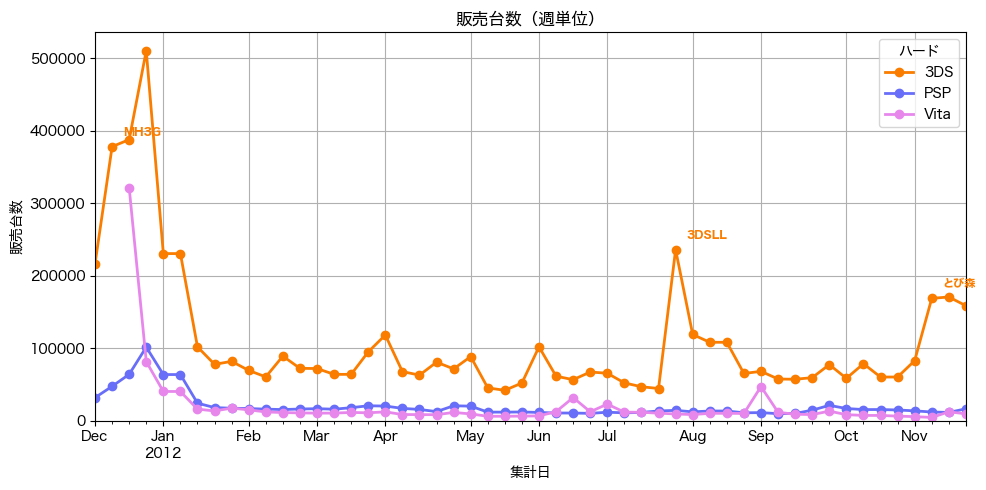

In [4]:

report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=3, event=2)
(fig, df) = ph.plot_sales(hw=['Vita', '3DS', 'PSP'], begin=datetime(2011, 12, 1), end=datetime(2012,11,30), event_mask=report_event_mask)

In [3]:
df.loc[:datetime(2012,5,13), ['Vita', 'PSP', '3DS']]

hw,Vita,PSP,3DS
report_date,,,
2011-12-04,NaN,31560.0,216350.0
2011-12-11,NaN,47238.0,378114.0
2011-12-18,321407.0,63792.0,387838.0
2011-12-25,81387.0,101370.0,510629.0
2012-01-01,40106.0,63468.0,230491.0
2012-01-08,40107.0,63469.0,230491.0
2012-01-15,15737.0,23942.0,101697.0
2012-01-22,13221.0,17874.0,77519.0
2012-01-29,17106.0,16939.0,81699.0


In [4]:
df = hs.load_hard_sales()
# hw毎にグループ化しsum_unitsが最大の行を抽出
idx = df.groupby('hw')['sum_units'].idxmax()
df_max = df.loc[idx].sort_values('sum_units', ascending=False).reset_index(drop=True)
df_max.loc[:, ['hw', 'sum_units']]

,hw,sum_units
0,NSW,36345202
1,DS,32602887
2,3DS,24388294
3,PS2,21235897
4,PSP,19458755
5,GBA,15535191
6,Wii,12575196
7,PS3,10080894
8,PS4,9491020
9,PS5,7259671


In [33]:
dfm = hs.load_hard_sales()
dfm = hs.monthly_sales(dfm, begin=datetime(2001, 1, 1), end=datetime(2025,12,31), maker_mode=True)

In [37]:
dfm11 = dfm.loc[dfm['month'] == 11, :]
dfm11y = dfm11.set_index('year')
dfm11y = dfm11y.loc[:, ['monthly_units', 'maker_name']]
dfm11y_wide = dfm11y.pivot_table(index='year', columns='maker_name', values='monthly_units', fill_value=0)
dfm11y_wide

maker_name,BANDAI,Microsoft,Nintendo,SEGA,SONY
year,,,,,
2001,22203.0,0.0,323033.0,850.0,162300.0
2002,8063.0,8431.0,392872.0,0.0,146058.0
2003,1514.0,7187.0,272547.0,0.0,261970.0
2004,0.0,8211.0,160376.0,0.0,365583.0
2005,0.0,533.0,425185.0,0.0,272547.0
2006,0.0,21771.0,553196.0,0.0,325386.0
2007,0.0,35065.0,521285.0,0.0,493499.0
2008,0.0,49901.0,781942.0,0.0,437110.0
2009,0.0,19131.0,511691.0,0.0,445161.0


<Axes: xlabel='year'>

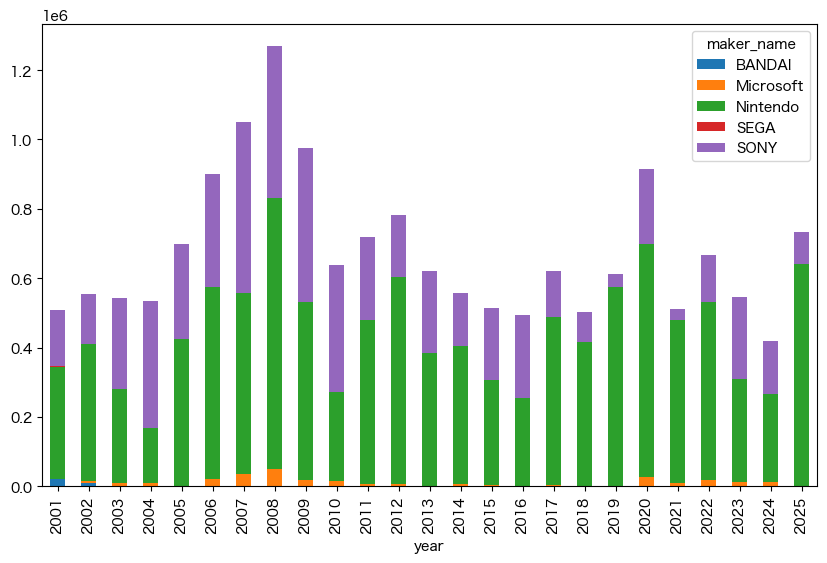

In [38]:
dfm11y_wide.plot(kind='bar', stacked=True, figsize=(10,6))

maker_name,BANDAI,Microsoft,Nintendo,SEGA,SONY
year,,,,,
2001,22203.0,0.0,323033.0,850.0,162300.0
2002,8063.0,8431.0,392872.0,0.0,146058.0
2003,1514.0,7187.0,272547.0,0.0,261970.0
2004,0.0,8211.0,160376.0,0.0,365583.0
2005,0.0,533.0,425185.0,0.0,272547.0
2006,0.0,21771.0,553196.0,0.0,325386.0
2007,0.0,35065.0,521285.0,0.0,493499.0
2008,0.0,49901.0,781942.0,0.0,437110.0
2009,0.0,19131.0,511691.0,0.0,445161.0


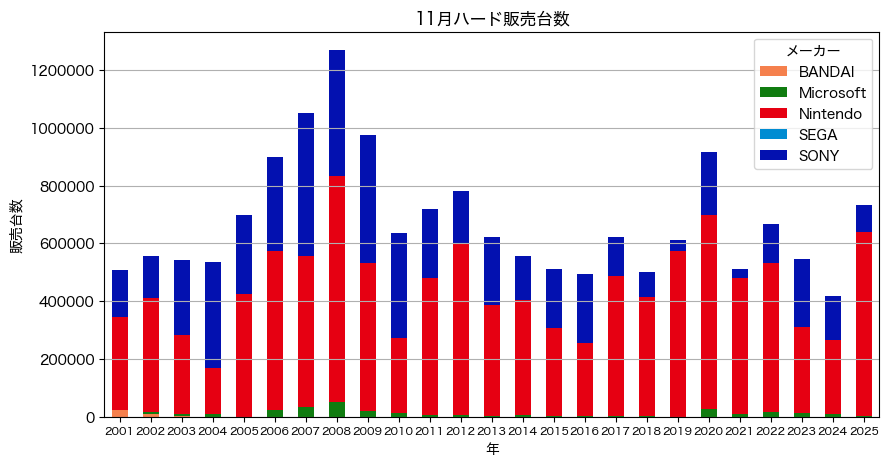

In [3]:
(fig, df) = ph.plot_yearly_bar_by_month(11, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))
df

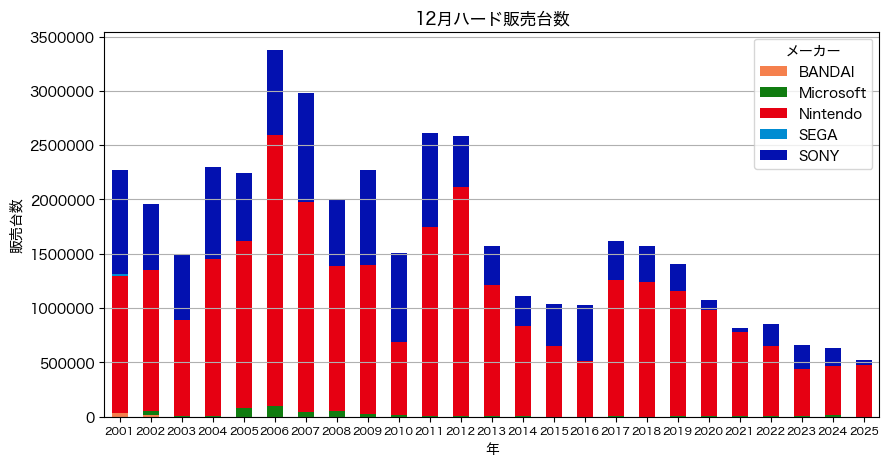

In [4]:
(fig, df) = ph.plot_yearly_bar_by_month(12, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))


maker_name,BANDAI,Microsoft,Nintendo,SEGA,SNK,SONY
year,,,,,,
2001,72382.0,0.0,204034.0,28682.0,4316.0,266869.0
2002,24171.0,0.0,684041.0,4206.0,0.0,603446.0
2003,12800.0,24631.0,572266.0,0.0,0.0,410138.0
2004,600.0,5998.0,589946.0,0.0,0.0,408650.0
2005,0.0,3082.0,819650.0,0.0,0.0,824172.0
2006,0.0,28167.0,1019016.0,0.0,0.0,613988.0
2007,0.0,43700.0,1161584.0,0.0,0.0,500494.0
2008,0.0,25192.0,963411.0,0.0,0.0,610959.0
2009,0.0,39305.0,767174.0,0.0,0.0,463620.0


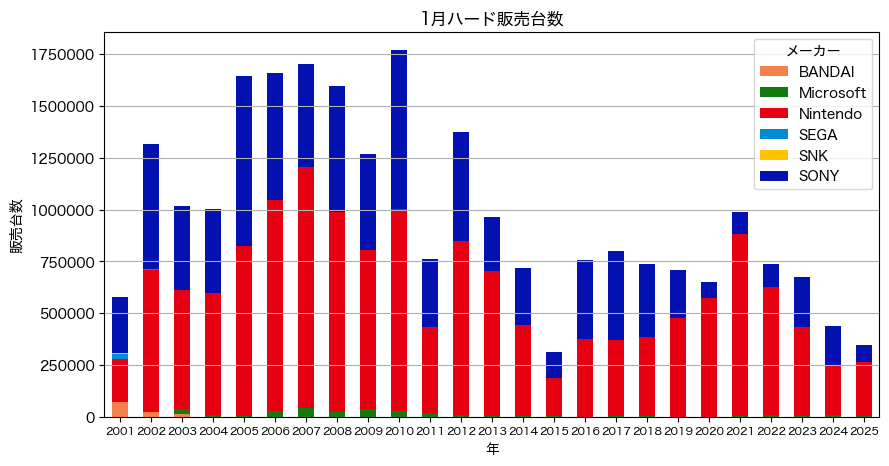

In [5]:
(fig, df) = ph.plot_yearly_bar_by_month(1, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))
df

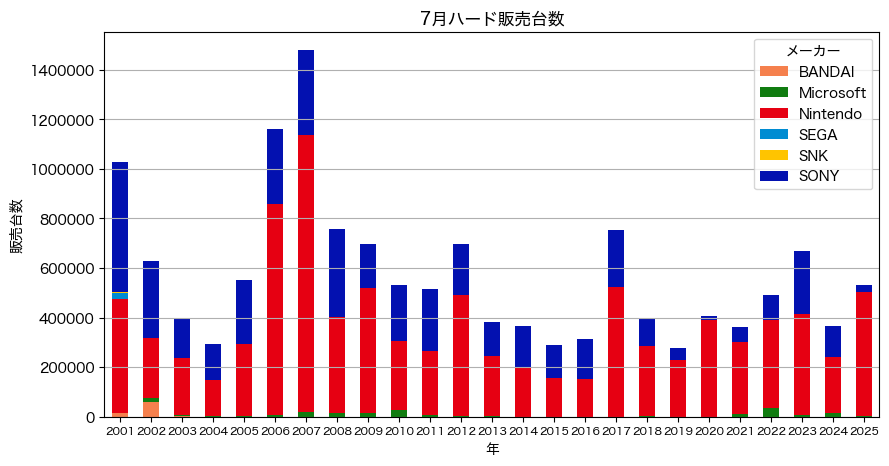

In [14]:
(fig, df) = ph.plot_yearly_bar_by_month(7, 
                                        ticklabelsize=8,
                                        begin=datetime(2001,1,1), end=datetime(2025,12,31))
